In [1]:
import sys
# add the code path
sys.path.append('..')

In [2]:
%load_ext autoreload
%autoreload 2

## Sample to train Yolo for object detection

In [3]:
from tfyolo3 import YoloV3, callbacks
from tfyolo3 import dataloaders
from pathlib import Path
import tensorflow as tf
from tfyolo3 import losses

Define the parameters for the run

In [4]:
image_shape = (256,256,3)
batch_shape = 2
max_objects = 100
train_dataset_path = '../tests/data/manifest.txt'
anchors = dataloaders.load_anchors('../tests/data/yolov3_anchors.txt')
classes = dataloaders.load_classes('../tests/data/classes.txt')

Create the model

In [5]:
model = YoloV3(image_shape, max_objects, 
               anchors=anchors, num_classes=len(classes), 
               training=True, backbone='ResNet50V2')

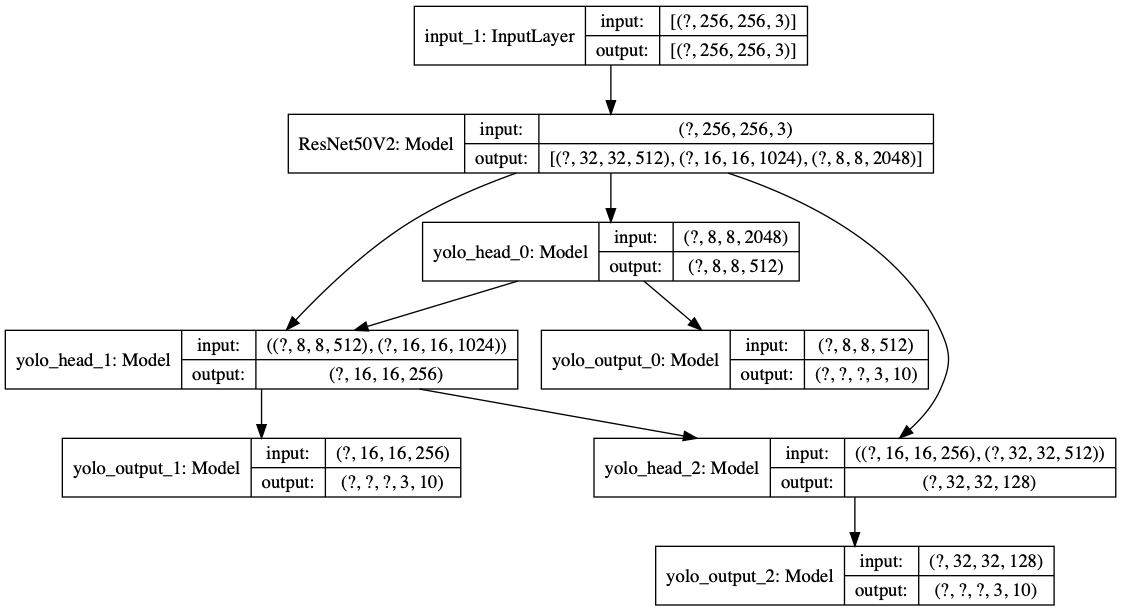

In [6]:
tf.keras.utils.plot_model(model.model, show_shapes=True)

Make optimizer and loss

In [7]:
optimizer = model.get_optimizer('adam', 1e-4)
loss = model.get_loss_function()

compile the model

In [11]:
model.compile(optimizer, loss, run_eagerly=True, summary=False)

Create the dataset

In [12]:
train_dataset = dataloaders.YoloDatasetMultiFile(
    train_dataset_path, image_shape, max_objects, batch_shape, 
    model.anchors, model.masks, len(classes)
)

In [13]:
print('num batches', len(train_dataset))

num batches 2


Create the callbacks

In [14]:
model_callbacks = callbacks.default_callbacks(model,
    checkpoints_path='./checkpoints', lrate_mode='exp_range',
    lrate_value=1e-3)

Set the model in transfer mode

In [15]:
model.set_mode_transfer()

In [16]:
history = model.fit(train_dataset, train_dataset, 5, callbacks=model_callbacks)

Train for 2 steps, validate for 2 steps

Epoch 00001: LearningRateScheduler reducing learning rate to 0.001.
Epoch 1/5
1/2 [==============>...............] - ETA: 2s - loss: 1487.1139 - yolo_output_0_loss: 82.8712 - yolo_output_1_loss: 260.7208 - yolo_output_2_loss: 1056.1301
Epoch 00001: val_loss improved from inf to 1515.39807, saving model to /Users/fumarolaf/git/tfyolo3/notebooks/checkpoints/weights.001-1437.268.h5

Epoch 00001: loss improved from inf to 1437.26752, saving model to /Users/fumarolaf/git/tfyolo3/notebooks/checkpoints/weights.001-1437.268.h5
2/2 [==============================] - 10s 5s/step - loss: 1437.2675 - yolo_output_0_loss: 84.6259 - yolo_output_1_loss: 244.7435 - yolo_output_2_loss: 1020.3457 - val_loss: 1515.3981 - val_yolo_output_0_loss: 100.8275 - val_yolo_output_1_loss: 264.8705 - val_yolo_output_2_loss: 1061.4950

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0014499730000000005.
Epoch 2/5
1/2 [==============>...............] - ETA: 2s - 

In [17]:
history.history

{'loss': [1437.2675170898438,
  1516.8375244140625,
  944.9432678222656,
  821.4102172851562,
  447.40283203125],
 'yolo_output_0_loss': [84.62592, 387.3368, 86.74902, 220.59839, 38.71939],
 'yolo_output_1_loss': [244.74348, 188.8143, 117.278336, 57.542107, 22.839487],
 'yolo_output_2_loss': [1020.3457, 852.09344, 650.1301, 448.7281, 286.17252],
 'val_loss': [1515.3980712890625,
  1886.1456298828125,
  34772.14453125,
  431982.15625,
  1049078336.0],
 'val_yolo_output_0_loss': [100.82751,
  479.81668,
  33434.645,
  431360.1,
  1049078200.0],
 'val_yolo_output_1_loss': [264.87048, 261.14606, 254.83453, 78.76572, 0.0],
 'val_yolo_output_2_loss': [1061.495,
  1055.2017,
  989.2901,
  445.09088,
  1.521138],
 'lr': [0.001, 0.001449973, 0.001899892, 0.0023497571, 0.002799568]}